<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/LSTM_anatomia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM_Anatomia


In [1]:
!pip install tensorflow===2.1.0

     |████████████████████████████████| 421.8MB 32kB/s 
     |████████████████████████████████| 450kB 43.5MB/s 
     |████████████████████████████████| 3.9MB 44.3MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import math
import random



In [3]:
#Montagem do Datraset de Treinamento
random.seed(42)
y=[]
seq=[]
for i in range(100):
  ini=random.randint(1,15)
  seq1=[]
  for j in range(3):
    seq1.append([ini+j])
  seq.append(seq1)
  y.append([ini+3])


X=np.array(seq)
y=np.array(y)
X[:3],y[:3]

(array([[[11],
         [12],
         [13]],
 
        [[ 2],
         [ 3],
         [ 4]],
 
        [[ 1],
         [ 2],
         [ 3]]]), array([[14],
        [ 5],
        [ 4]]))

In [9]:
#Criação do Modelo
model = tf.keras.Sequential()
#inserir uma camada LSTM com 1 célula
model.add(tf.keras.layers.LSTM(1, activation=lambda x: x, input_shape=(None, 1)))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [10]:
hist=model.fit(X, y, epochs=500,validation_split=0.3, verbose=1)

Train on 70 samples, validate on 30 samples
Epoch 1/500
70/70 [==============================] - 1s 15ms/sample - loss: 119.9444 - val_loss: 139.3865
Epoch 2/500
70/70 [==============================] - 0s 320us/sample - loss: 119.9333 - val_loss: 139.3778
Epoch 3/500
70/70 [==============================] - 0s 278us/sample - loss: 119.9219 - val_loss: 139.3693
Epoch 4/500
70/70 [==============================] - 0s 274us/sample - loss: 119.9123 - val_loss: 139.3609
Epoch 5/500
70/70 [==============================] - 0s 268us/sample - loss: 119.9009 - val_loss: 139.3526
Epoch 6/500
70/70 [==============================] - 0s 290us/sample - loss: 119.8906 - val_loss: 139.3443
Epoch 7/500
70/70 [==============================] - 0s 300us/sample - loss: 119.8799 - val_loss: 139.3361
Epoch 8/500
70/70 [==============================] - 0s 279us/sample - loss: 119.8700 - val_loss: 139.3280
Epoch 9/500
70/70 [==============================] - 0s 263us/sample - loss: 119.8598 - val_loss: 139

In [0]:
ye=model.predict(X)

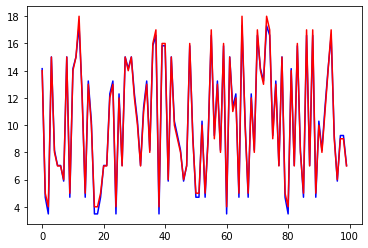

X:  [[[3]
  [4]
  [5]]

 [[6]
  [7]
  [8]]

 [[6]
  [7]
  [8]]

 [[4]
  [5]
  [6]]] 


 YE: [[6]
 [9]
 [9]
 [7]]


In [19]:

import matplotlib.pyplot as plt
plt.plot(ye,color='blue')
plt.plot(y,color='red')
plt.show()

print("X: ", X[96:], "\n\n\n YE:", y[96:])

In [21]:
w=model.get_weights()# os pesos vêm na ordem : Pesos do input, Pesos da recorrência e bias
w

[array([[-0.10655083,  1.0022012 ,  0.54018253,  1.2279482 ]],
       dtype=float32),
 array([[ 0.83143854,  1.381299  , -0.1845527 ,  0.23537627]],
       dtype=float32),
 array([0.72938424, 1.3907549 , 0.59400177, 0.42110553], dtype=float32)]

In [23]:
print(model.layers[0].trainable_weights)

[<tf.Variable 'lstm_3/kernel:0' shape=(1, 4) dtype=float32, numpy=
array([[-0.10655083,  1.0022012 ,  0.54018253,  1.2279482 ]],
      dtype=float32)>, <tf.Variable 'lstm_3/recurrent_kernel:0' shape=(1, 4) dtype=float32, numpy=
array([[ 0.83143854,  1.381299  , -0.1845527 ,  0.23537627]],
      dtype=float32)>, <tf.Variable 'lstm_3/bias:0' shape=(4,) dtype=float32, numpy=array([0.72938424, 1.3907549 , 0.59400177, 0.42110553], dtype=float32)>]


ifco é a ordem dos pesos em cada um dos 3 conjuntos:
input (posição 0),
forget (posição 1)
content (posição 2)
output (posição 3)

In [0]:
ww,uw,bw=w[0],w[1],w[2]


In [0]:
def sig(z):
  return 1/(1+math.exp(-z))

In [0]:
def tanh(z):
  return (math.exp(2*z)-1)/(math.exp(2*z)+1)

In [0]:
#função oper: aplica peso U no output anterior (h), W no input atual (x), soma bias e aplica ativação
def oper(U,W,B,x,h,activ):
  return activ(U*h+W*x+B)

In [28]:
X[0]

array([[11],
       [12],
       [13]])

Inicialmente (tempo 0), o output anterior e a memória são nulas

In [32]:
#Calcule i (filtro input). Dica use função oper
i = oper(uw[0][0], ww[0][0], bw[0], X[0][0], 0, sig)
i

0.39110378846808774

In [34]:
#Calcule f (filtro forget). Dica use função oper
f = oper(uw[0][1], ww[0][1], bw[1], X[0][0], 0, sig)
f

0.999995942616257

In [45]:
#Calcule cb (conteúdo novo proposto). Dica use função oper
cb = oper(uw[0][2], ww[0][2], bw[2], X[0][0], 0, lambda x: x)
cb  

array([6.53600961])

In [46]:
#Calcule  o (output). Dica use função oper
o=oper(uw[0][3], ww[0][3], bw[3], X[0][0], 0, sig)
o

0.999999106872513

In [47]:
#Calcule o conteúdo novo (depois de aplicar filtros f e i)
cant=0.0
c=f*cant+i*cb
c

array([2.55625812])

In [48]:
#calcule o output o*c
out=o*c
out

array([2.55625584])

In [51]:
#compare com o output do .predict
model.predict(np.array([[X[0,0]]]))

array([[2.556256]], dtype=float32)

In [52]:
#Agora, atualize cant, o output anterior e o novo input..para calcular o segundo output
cant=c
inp=X[0][1]
oa= out
i=oper(uw[0][0],ww[0][0],bw[0],inp,oa,sig)
f=oper(uw[0][1],ww[0][1],bw[1],inp,oa,sig)
cb=oper(uw[0][2],ww[0][2],bw[2],inp,oa,lambda x:x)
o=oper(uw[0][3],ww[0][3],bw[3],inp,oa,sig)
c=f*cant+i*cb
out=o*c
out

array([8.02906724])

In [53]:
#compare com o output do .predict
model.predict(np.array([[X[0,0],X[0,1]]]))

array([[8.029067]], dtype=float32)

In [54]:
#Agora, atualize cant, o output anterior e o novo input..para calcular o terceiro output
cant=c
inp= X[0][2]
oa= out
i=oper(uw[0][0],ww[0][0],bw[0],inp,oa,sig)
f=oper(uw[0][1],ww[0][1],bw[1],inp,oa,sig)
cb=oper(uw[0][2],ww[0][2],bw[2],inp,oa,lambda x:x)
o=oper(uw[0][3],ww[0][3],bw[3],inp,oa,sig)
c=f*cant+i*cb
out=o*c
out

array([14.14878648])

In [55]:
#compare com o output do .predict
model.predict(np.array([[X[0,0],X[0,1],X[0,2]]]))

array([[14.148786]], dtype=float32)

In [56]:
model.layers[0].get_config()

{'activation': '<lambda>',
 'activity_regularizer': None,
 'batch_input_shape': (None, None, 1),
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dropout': 0.0,
 'dtype': 'float32',
 'go_backwards': False,
 'implementation': 2,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'lstm_3',
 'recurrent_activation': 'sigmoid',
 'recurrent_constraint': None,
 'recurrent_dropout': 0.0,
 'recurrent_initializer': {'class_name': 'Orthogonal',
  'config': {'gain': 1.0, 'seed': None}},
 'recurrent_regularizer': None,
 'return_sequences': False,
 'return_state': False,
 'stateful': False,
 'time_major': False,
 'trainable': True,
 'unit_forget_bias': True,
 'units': 1,
 'unroll': False,
 'use_bias': True}